# Pre-modeling +

--Variable Level	Variable naming convention - Does variables required renaming?

	Data types -Any mismatch in data types?							
	Does data have any special characters?							
		#NA, Nan, #Error, #Division, -inf, inf, 999999, etc.						
	Does data have any missing values?							
		Encoded missings with 0, 999999, unknown, not avaialable, NA etc						
	Does data any outliers							
		Reasons for outliers						
	Categorical variables - Ordinal vs. nominal							
		Converting categorical variables into numerical variables (encoding)						
			Ordinal 	Label/One-Hot encoding (dummy variables)				
			Nomianl	One-hot encoding				
	Does data having any date variables?							
		Derived variables out of Date variables						
	String variables - Extract variables out of string which can make sense							
	Does data have any duplicates?							
		Key level (one variable or combination of variable)						
		Record level						
	Derived variables - Definition							
	Exploratory analysis							
		Univariate		Distribution, variation etc				
		Bivariate		Relationships				
	Does variable having variance?							
		Near zero variance variable (CV<0.05)	

-- Import Packages

In [16]:
#Packages(s) for Operating Systems::
import os


#Packages(s) for Data Importing & Manipulations::
import numpy as np
import pandas as pd
import datetime as dt
import pandas_profiling as pp
import re


#Packages(s) for Basic Statistic Analysis::
import scipy.stats as stats
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns


#Packages(s) for Model Building Part::
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import sklearn.feature_selection as feature_selection


#Packages(s) for building models::
#!pip install statsmodels
import statsmodels as st
import statsmodels.formula.api as smp
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


-- Importing Data

In [17]:
interestRate = pd.read_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\3. Peer Group Lending - Predicting Intrest Rates\LoansData.csv')
interestRate.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


-- High level observation of imported data

In [18]:
interestRate.info()
#Initial observations::
    #Here no variables have missing values.
    #Some of the variables are continuous (e.g., Amount.Requested, Monthly.Income etc.) and some of them are categorical (e.g., Interest.Rate, FICO.Range)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

-- Pandas_profiling

In [19]:
profile_report = pp.ProfileReport(interestRate)
profile_report.to_file(r'E:\AI\ALabs\Python - ML\Assignments-ML\3. Peer Group Lending - Predicting Intrest Rates\PredictingInterestRates_ProfileReport.html')

In [20]:
##
    #1. There are missing values, need to be handled
    #2. Need to rename columns by hyphen/underscore as they contain '.'.
    #3. Need to convert some categorical variables into numerical
        #a. Debt income ratio
        #b. Interest Rate
        #c. Fico Score
        #d. Loan Length
        #e. Employment Length
        
    #4. Can keep variable amount requested
    #5. Can drop 2 variables(LoanID, Amount Funded Investor)
    #6. Outliers
    #7. Variables with low variation
    #8. Converting categorical variables into numerical except Step #3 variables.
        #a. Dummy Variables
    #9. Handle None

-- Renaming columns

In [21]:
interestRate.columns = [i.replace('.','_') for i in interestRate.columns]
interestRate.columns

Index(['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

-- Change Data-Types:

In [22]:
interestRate['Interest_Rate'] = interestRate['Interest_Rate'].apply(lambda x: float(str(x).replace('%','')))
interestRate['Debt_To_Income_Ratio'] = interestRate['Debt_To_Income_Ratio'].apply(lambda x: float(str(x).replace('%','')))

#Check the changed data - types
interestRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount_Requested                2499 non-null   float64
 2   Amount_Funded_By_Investors      2499 non-null   float64
 3   Interest_Rate                   2498 non-null   float64
 4   Loan_Length                     2500 non-null   object 
 5   Loan_Purpose                    2500 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   float64
 7   State                           2500 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2499 non-null   float64
 10  FICO_Range                      2498 non-null   object 
 11  Open_CREDIT_Lines               2497 non-null   float64
 12  Revolving_CREDIT_Balance        24

-- Converting Range variables into Average

In [23]:
interestRate[['Fico_low','Fico_high']] = interestRate['FICO_Range'].str.split('-',expand = True)
interestRate['Fico_avg'] = (interestRate.Fico_low.astype('float')+interestRate.Fico_high.astype('float'))/2
interestRate.info()
interestRate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount_Requested                2499 non-null   float64
 2   Amount_Funded_By_Investors      2499 non-null   float64
 3   Interest_Rate                   2498 non-null   float64
 4   Loan_Length                     2500 non-null   object 
 5   Loan_Purpose                    2500 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   float64
 7   State                           2500 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2499 non-null   float64
 10  FICO_Range                      2498 non-null   object 
 11  Open_CREDIT_Lines               2497 non-null   float64
 12  Revolving_CREDIT_Balance        24

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_low,Fico_high,Fico_avg
0,1,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,735,739,737.0
1,2,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,715,719,717.0
2,3,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,690,694,692.0
3,4,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,695,699,697.0
4,5,12000.0,12000.0,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,695,699,697.0


-- Removing string from continuous variables

In [24]:
interestRate['Loan_Length'] = interestRate['Loan_Length'].apply(lambda x: float(str(x).replace(' months','')))
interestRate.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_low,Fico_high,Fico_avg
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,735,739,737.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,715,719,717.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,690,694,692.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,695,699,697.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,695,699,697.0


-- Replacing all special characters like >, < , + etc.

In [25]:
interestRate['Employment_Length'] = interestRate['Employment_Length'].apply(lambda x: str(x).replace('< ',''))
interestRate['Employment_Length'] = interestRate['Employment_Length'].apply(lambda x: str(x).replace('+',''))
interestRate['Employment_Length'] = interestRate['Employment_Length'].apply(lambda x: str(x).replace(' years',''))
interestRate['Employment_Length'] = interestRate['Employment_Length'].apply(lambda x: float(str(x).replace(' year','')))
interestRate.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_low,Fico_high,Fico_avg
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,735,739,737.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,715,719,717.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,690,694,692.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,695,699,697.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,695,699,697.0


-- droping unwanted columns

In [26]:
interestRate.drop(['Fico_low','Fico_high','FICO_Range','LoanID','Amount_Funded_By_Investors'], axis = 1, inplace = True)
interestRate.columns

Index(['Amount_Requested', 'Interest_Rate', 'Loan_Length', 'Loan_Purpose',
       'Debt_To_Income_Ratio', 'State', 'Home_Ownership', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'Fico_avg'],
      dtype='object')

-- Separating Categorical & Numerical variables

In [27]:
##Categorical Variables
cat_vars = ['Loan_Purpose','State','Home_Ownership']

##Numerical Variables
num_vars = ['Amount_Requested', 'Interest_Rate', 'Loan_Length',
       'Debt_To_Income_Ratio', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'Fico_avg']

In [28]:
data_cat = interestRate[cat_vars]
data_num = interestRate[num_vars]
display(data_cat)
display(data_num)

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,SC,MORTGAGE
1,debt_consolidation,TX,MORTGAGE
2,debt_consolidation,CA,MORTGAGE
3,debt_consolidation,KS,MORTGAGE
4,credit_card,NJ,RENT
...,...,...,...
2495,debt_consolidation,NY,MORTGAGE
2496,home_improvement,MD,OWN
2497,debt_consolidation,PA,MORTGAGE
2498,major_purchase,NJ,RENT


,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,19.23,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,16000.0,14.09,60.0,21.54,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,10000.0,13.99,36.0,4.89,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,6000.0,12.42,36.0,16.66,3500.00,8.0,7753.0,0.0,5.0,677.0


-- Handling Outliers

In [29]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

#data_num = data_num.apply(lambda x: outlier_capping(x))
data_num = data_num.apply(outlier_capping)
display(data_num)

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,19.23,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,16000.0,14.09,60.0,21.54,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,10000.0,13.99,36.0,4.89,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,6000.0,12.42,36.0,16.66,3500.00,8.0,7753.0,0.0,5.0,677.0


-- Handle Missings: Continuous Variables

In [30]:
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num = data_num.apply(lambda x: Missing_imputation(x))
display(data_num)

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,19.23,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,16000.0,14.09,60.0,21.54,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,10000.0,13.99,36.0,4.89,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,6000.0,12.42,36.0,16.66,3500.00,8.0,7753.0,0.0,5.0,677.0


-- Handle Missings: Categorical Variables

In [31]:
def Cat_Missing_imputation(x):
    x = x.fillna(x.mode())
    return x

data_cat = data_cat.apply(lambda x: Cat_Missing_imputation(x))
display(data_cat)

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,SC,MORTGAGE
1,debt_consolidation,TX,MORTGAGE
2,debt_consolidation,CA,MORTGAGE
3,debt_consolidation,KS,MORTGAGE
4,credit_card,NJ,RENT
...,...,...,...
2495,debt_consolidation,NY,MORTGAGE
2496,home_improvement,MD,OWN
2497,debt_consolidation,PA,MORTGAGE
2498,major_purchase,NJ,RENT


In [32]:
data_final = pd.concat([data_num, data_cat],axis = 1)
data_final.head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg,Loan_Purpose,State,Home_Ownership
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,debt_consolidation,SC,MORTGAGE
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,debt_consolidation,TX,MORTGAGE
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,debt_consolidation,CA,MORTGAGE
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,debt_consolidation,KS,MORTGAGE
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,credit_card,NJ,RENT


-- Dummy Variables

In [33]:
pd.get_dummies(data_final,['Loan_Purpose','State','Home_Ownership'])

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg,...,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,1,0,0,0,0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,1,0,0,0,0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,1,0,0,0,0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,1,0,0,0,0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,19.23,9250.00,15.0,45880.0,1.0,8.0,707.0,...,0,0,0,0,0,1,0,0,0,0
2496,16000.0,14.09,60.0,21.54,8903.25,18.0,18898.0,1.0,10.0,742.0,...,0,0,0,0,0,0,0,0,1,0
2497,10000.0,13.99,36.0,4.89,2166.67,4.0,4544.0,0.0,10.0,682.0,...,0,0,0,0,0,1,0,0,0,0
2498,6000.0,12.42,36.0,16.66,3500.00,8.0,7753.0,0.0,5.0,677.0,...,0,0,0,0,0,0,0,0,0,1


-- Dummy Variables

In [34]:
data_final = pd.get_dummies(data_final,['Loan_Purpose','State','Home_Ownership'],drop_first = True)
data_final.head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,0,1


-- Finding Coefficient of Variance to exclude variables which are very small. Bcoz CV is very small then there is no point of keepig those variables. S0, Calculating CV for all the variables

In [35]:
cv_vars = data_final.apply(lambda x: np.mean(x)/np.std(x))
cv_vars.to_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\3. Peer Group Lending - Predicting Intrest Rates\PredictingInterestRates_cv.csv')
cv_vars

Amount_Requested        1.591843
Interest_Rate           3.149551
Loan_Length             4.155624
Debt_To_Income_Ratio    2.056638
Monthly_Income          1.819013
                          ...   
State_WY                0.040032
Home_Ownership_NONE     0.020004
Home_Ownership_OTHER    0.044766
Home_Ownership_OWN      0.294884
Home_Ownership_RENT     0.919990
Length: 72, dtype: float64

-- Dropping columns whose CV is very less. if (CV(col)<0.05) exclude them.

In [36]:
data_final.drop(['Loan_Purpose_renewable_energy','State_IA','State_IN','State_MS','State_SD','State_VT','State_WY',
                'Home_Ownership_NONE','Home_Ownership_OTHER'],axis =1, inplace=True)

# Data Preparation Step 1 -

# Modeling - Data Preparation Step 1 +

-- Aggregate the data at customer level/store level/branch level based on business objective:

	  a. Joining multiple tables							
	  b. appending multiple tables							
	  c. creating new columns							
	  d. aggregate data							
	  e. Renaming the variables							
	  f. converting data types

In [37]:
        #   a. Joining multiple tables  : Not required here.                          
        #   b. appending multiple tables  : Not required here.                        
        #   c. creating new columns  : Not required here.                            
        #   d. aggregate data  : Not required here.                            
        #   e. Renaming the variables  : Not required here.                            
        #   f. converting data types  : Not required here.

-- Handling missing values:				

	a. Imputation with middle value (Mean, Median, Mode) or KNN Imputation, regression based imputation, MICE.
	b. Drop the variables or observations:								
		i. variables with more than 25% observations missings					
		ii. observations with more than 50 % of values of columns

In [38]:
# 	a. Imputation with middle value (Mean, Median, Mode) or KNN Imputation, regression based imputation, MICE.: Not Required.
# 	b. Drop the variables or observations: Not Required.
# 		i. variables with more than 25% observations missings: Not Required.
# 		ii. observations with more than 50 % of values of columns: Not Required.

-- Handling outliers:

	a. Identificiation of outliers using upper cap and lower cap					
	b. Method	LC	                    UC			
	           1	P1, P5	            P99, P95			
	           2	mean-3/2.5std	    mean+3/2.5std			
               3	Q1-1.5*IQR	        Q3+1.5*IQR			
						
	c. Less number of outliers, you can Cap or floor outliers					
	d. more number of outliers, build model for each group

In [39]:
# 	a. Identificiation of outliers using upper cap and lower cap: Not Required. 
# 	b. Method	LC	                UC			: Not Required.
# 	   1	    P1, P5	            P99, P95			
# 	   2	    mean-3/2.5std	    mean+3/2.5std			
#      3	    Q1-1.5*IQR	        Q3+1.5*IQR			
						
# 	c. Less number of outliers, you can Cap or floor outliers: Not Required.
# 	d. more number of outliers, build model for each group: Not Required.

--2.4 Converting categorical variables into numerical variables:

	a. Ordinal	Label encoding			
	b. Nominal	One-Hot encoding

In [40]:
# 	a. Ordinal	Label encoding: Not Required.
# 	b. Nominal	One-Hot encoding: Not Required.

# Modeling - Data Preparation Step 1: Based on data audit -

# Modeling - Data Preparation Step 2: Based on the technique +

--Apply transformations on X or Y depends on the situation

-- Assumptions of Linear Regression: If you don’t follow the assumptions, you may end up with model with overfitting or underfitting problems:

a. Y variable should follow normal distribution                
b. Y & Each X variable should have linear relationship                
c. No missings                
d. No outliers                
e. No multicollinierity                
f. No hetroscendasticity

-- Y value should normally be distributed. But from the histogram shown below, data is not Normally distributed well. So, will look for evaluating the best way of applying the transformation.

<AxesSubplot:>

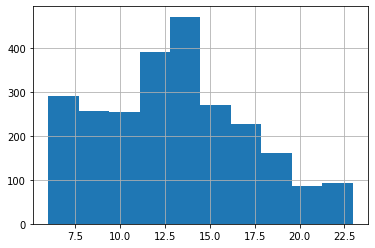

In [41]:
data_final.Interest_Rate.hist()

-- Evaluating Best way of applying Transformation

<AxesSubplot:>

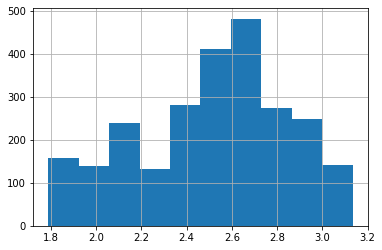

In [42]:
data_final['ln_Interest_Rate'] = np.log(data_final.Interest_Rate)
data_final.ln_Interest_Rate.hist()
#So, compare to Y normal distribution, log transformation looks little better

E:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ln_Interest_Rate', ylabel='Density'>

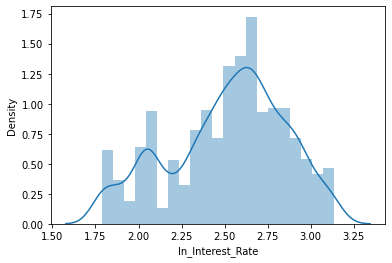

In [43]:
sns.distplot(data_final.ln_Interest_Rate)

E:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

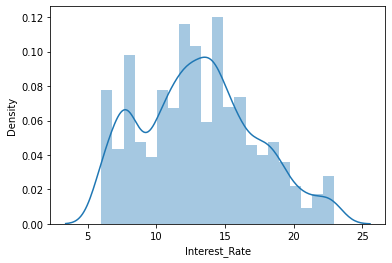

In [44]:
sns.distplot(data_final.Interest_Rate)
#Cross-checking if Y is following the normal distribution or not by doing above 2 steps:
##sns.distplot(data_final.ln_Interest_Rate)
##sns.distplot(data_final.Interest_Rate)
###99% time log gives better result here.

-- Looking at the assumptions - Linearity relationship between Y & Xs

In [45]:
corr_mat = data_final.corr() ##Correlation matrix...
corr_mat.to_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\3. Peer Group Lending - Predicting Intrest Rates\LendingInterestRates_Corr_Matrix.csv')
corr_mat

#Here Interest_Rate is not the Y variable, rather ln_Interest_Rate as we have done Transformation

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg,...,State_SC,State_TX,State_UT,State_VA,State_WA,State_WI,State_WV,Home_Ownership_OWN,Home_Ownership_RENT,ln_Interest_Rate
Amount_Requested,1.000000,0.330780,0.412678,0.082025,0.458647,0.194894,0.342755,-0.022045,0.165058,0.081684,...,-0.027394,0.011139,-0.029010,0.012011,-0.004958,-0.025626,-0.011311,-0.037239,-0.133911,0.301991
Interest_Rate,0.330780,1.000000,0.423147,0.173002,0.036206,0.083050,0.083611,0.170408,0.052629,-0.712008,...,-0.006930,0.020980,0.001154,0.010971,-0.003071,0.019429,0.019641,-0.010484,0.074992,0.982431
Loan_Length,0.412678,0.423147,1.000000,0.025450,0.104451,0.043536,0.080894,0.031553,0.074383,0.011664,...,-0.028827,-0.034731,-0.030399,0.032825,0.021108,0.021928,0.021434,-0.031505,-0.064430,0.386342
Debt_To_Income_Ratio,0.082025,0.173002,0.025450,1.000000,-0.169497,0.370845,0.219636,0.012432,0.049184,-0.218758,...,0.014387,0.063498,-0.006585,0.019989,0.012063,-0.001499,0.065453,0.034046,-0.011685,0.178772
Monthly_Income,0.458647,0.036206,0.104451,-0.169497,1.000000,0.225932,0.434749,0.038936,0.109415,0.116830,...,-0.002576,-0.009464,-0.017378,0.065415,-0.019020,-0.019149,-0.032435,-0.078723,-0.210431,0.014245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
State_WI,-0.025626,0.019429,0.021928,-0.001499,-0.019149,0.011376,-0.002998,0.020564,-0.002789,-0.022556,...,-0.010910,-0.028039,-0.008228,-0.018397,-0.015799,1.000000,-0.007965,-0.030230,0.000646,0.014466
State_WV,-0.011311,0.019641,0.021434,0.065453,-0.032435,0.029833,0.002709,0.025881,-0.018573,-0.016951,...,-0.008269,-0.021250,-0.006235,-0.013943,-0.011974,-0.007965,1.000000,0.015274,0.001289,0.019581
Home_Ownership_OWN,-0.037239,-0.010484,-0.031505,0.034046,-0.078723,-0.011306,-0.032363,-0.022319,-0.023651,0.005398,...,0.024659,0.017846,-0.023667,-0.018997,-0.016063,-0.030230,0.015274,1.000000,-0.271290,-0.013740
Home_Ownership_RENT,-0.133911,0.074992,-0.064430,-0.011685,-0.210431,-0.154724,-0.199250,-0.082150,-0.225850,-0.152437,...,-0.036885,-0.049723,-0.013433,-0.021957,-0.040461,0.000646,0.001289,-0.271290,1.000000,0.086009


-- Feature Selection

In [46]:
data_final.info()
##Will start eliminating the features that are big in numbers as of now (Total 64).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount_Requested                 2500 non-null   float64
 1   Interest_Rate                    2500 non-null   float64
 2   Loan_Length                      2500 non-null   float64
 3   Debt_To_Income_Ratio             2500 non-null   float64
 4   Monthly_Income                   2500 non-null   float64
 5   Open_CREDIT_Lines                2500 non-null   float64
 6   Revolving_CREDIT_Balance         2500 non-null   float64
 7   Inquiries_in_the_Last_6_Months   2500 non-null   float64
 8   Employment_Length                2500 non-null   float64
 9   Fico_avg                         2500 non-null   float64
 10  Loan_Purpose_credit_card         2500 non-null   uint8  
 11  Loan_Purpose_debt_consolidation  2500 non-null   uint8  
 12  Loan_Purpose_educati

In [47]:
#When we use statsmodel, we don't need separate X & Y. But, whenever we require Sklearn, all modules need X & Y variables 
#organized separately. 

In [48]:
#Features means X variables, Target means Y - variable.
features = data_final[data_final.columns.difference(['ln_Interest_Rate','Interest_Rate'])]
#Difference of this will give features

target = data_final['ln_Interest_Rate']

# Modeling - Data Preparation Step 2: Based on the technique -

# Modeling - Data Preparation Step 3: Feature Engineering - Feature selection - Variable reduction +

You can drop variables based on the data audit:

	If variables having lots of missings (>25%)					
	If nominal categorical having lots of categories (>25)					
	If variable having very less variation (CV<0.05)					
	Unique identifiers (Custid, Email, phone number, identification details)					
	Business understanding 					


In [49]:
# You can drop variables based on the data audit: Not required here.
# 	If variables having lots of missings (>25%): Not required here.
# 	If nominal categorical having lots of categories (>25): Not required here.
# 	If variable having very less variation (CV<0.05)					
# 	Unique identifiers (Custid, Email, phone number, identification details): Not required here.
# 	Business understanding: Not required here.

--Based on the relationships:

 Based on Y & X relationships:
 
    Statistical methods (Corr, chisquare, Anova)                
    RFE - Recursive Feature Elimination                
    SelectKbest - Selecting K best features                
    Univariate Models            f-regression    
        Y & X            

-- Now, will build the model & recursively eliminate the features.

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import itertools

lm = LinearRegression()

#RFE

#Create the RFE model & select 10 attributes.
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features,target)

In [51]:
features.columns

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'Fico_avg', 'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_educational', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_medical', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_small_business', 'Loan_Purpose_vacation',
       'Loan_Purpose_wedding', 'Monthly_Income', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_HI', 'State_IL', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_MI', 'State_MN', 'State_MO', 'State_MT',
       'State_NC', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY',
       'State_

In [52]:
rfe.support_

array([False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [53]:
#So, rfe.support_ gives the 10 features to select. But such kind of feature selection sometimes not correct if we have 
#Multi-collinearity. As we see 'Amount_Requested','Fico_avg' etc have been eliminated above.

##To handle this problem, there are some techniques that handle multi-collinearity situation and provide important 
#features to consider. RandomForestRegressor() works here.

#Now, will build the model & recursively eliminate the features.
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import itertools

lm = RandomForestRegressor()

#RFE

#Create the RFE model & select 10 attributes.
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features,target)

features.columns
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

-- So, choosing top 10 features now

In [54]:
features.columns[rfe.support_]

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'Fico_avg', 'Home_Ownership_RENT', 'Inquiries_in_the_Last_6_Months',
       'Loan_Length', 'Monthly_Income', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance'],
      dtype='object')

-- F-Regression # Feature selection based on importance

In [55]:
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(features, target)
display(F_values)
display(p_values)

array([2.50674653e+02, 8.24699064e+01, 3.24654802e+00, 3.10072444e+03,
       4.71656492e-01, 1.86167622e+01, 8.11937401e+01, 4.38267854e+02,
       6.38051931e-02, 4.53726616e+01, 3.36416285e+00, 2.40975974e+01,
       2.52433744e-02, 3.16249583e+01, 5.12191332e+00, 2.28115373e-01,
       1.53763763e-01, 3.18810291e-01, 1.57692090e+00, 1.76830111e+00,
       5.06966626e-01, 1.17181882e+01, 1.60049914e+01, 2.59978113e-03,
       7.02365347e-02, 1.76650798e-01, 2.58188753e-02, 2.73831235e-02,
       9.98895925e-01, 1.62506017e-01, 5.15208715e-01, 1.70134256e-01,
       1.68426979e+00, 4.92284444e+00, 1.30627695e+00, 5.36605717e-01,
       4.98805770e-01, 3.63210792e+00, 6.02318478e-01, 5.52931303e-02,
       6.40563614e+00, 1.00104919e+00, 2.90398801e-01, 2.42017348e+00,
       8.24289039e-01, 1.52135002e+00, 2.60345981e-01, 1.16046979e+00,
       3.46493203e-01, 3.93646651e-04, 3.31333898e+00, 6.63328785e-01,
       5.57023879e-01, 1.64411358e+00, 1.53550823e-02, 3.43470568e-02,
      

array([7.06795949e-54, 2.12246825e-19, 7.16945719e-02, 0.00000000e+00,
       4.92289837e-01, 1.66025025e-05, 3.96614065e-19, 8.53692410e-90,
       8.00600510e-01, 2.01456973e-11, 6.67483269e-02, 9.74776318e-07,
       8.73774972e-01, 2.07811796e-08, 2.37110423e-02, 6.32966573e-01,
       6.94997662e-01, 5.72374192e-01, 2.09322213e-01, 1.83713879e-01,
       4.76521428e-01, 6.28892755e-04, 6.50121839e-05, 9.59339120e-01,
       7.91014563e-01, 6.74303582e-01, 8.72356443e-01, 8.68580786e-01,
       3.17674612e-01, 6.86894190e-01, 4.72959813e-01, 6.80027913e-01,
       1.94477886e-01, 2.65934120e-02, 2.53179368e-01, 4.63911568e-01,
       4.80091191e-01, 5.67896725e-02, 4.37768258e-01, 8.14115534e-01,
       1.14367665e-02, 3.17153676e-01, 5.90013103e-01, 1.19908341e-01,
       3.64016705e-01, 2.17531356e-01, 6.09927642e-01, 2.81472151e-01,
       5.56158207e-01, 9.84172170e-01, 6.88393444e-02, 4.15464845e-01,
       4.55532090e-01, 1.99880981e-01, 9.01392050e-01, 8.52985577e-01,
      

In [56]:
itertools.zip_longest(features.columns, F_values, p_values)
f_reg_results = [(i,v,z) for i, v, z in itertools.zip_longest(features.columns, F_values, ['%.3f' % p for p in p_values])]
f_reg_results ## Tuple with Features with their F_values & p_values

[('Amount_Requested', 250.67465313304518, '0.000'),
 ('Debt_To_Income_Ratio', 82.46990636011469, '0.000'),
 ('Employment_Length', 3.246548023419247, '0.072'),
 ('Fico_avg', 3100.724444588156, '0.000'),
 ('Home_Ownership_OWN', 0.47165649226157114, '0.492'),
 ('Home_Ownership_RENT', 18.616762232348947, '0.000'),
 ('Inquiries_in_the_Last_6_Months', 81.19374010052636, '0.000'),
 ('Loan_Length', 438.267854267143, '0.000'),
 ('Loan_Purpose_credit_card', 0.06380519312531893, '0.801'),
 ('Loan_Purpose_debt_consolidation', 45.3726615624724, '0.000'),
 ('Loan_Purpose_educational', 3.364162854835718, '0.067'),
 ('Loan_Purpose_home_improvement', 24.097597395178436, '0.000'),
 ('Loan_Purpose_house', 0.025243374403074965, '0.874'),
 ('Loan_Purpose_major_purchase', 31.624958318616546, '0.000'),
 ('Loan_Purpose_medical', 5.12191331594625, '0.024'),
 ('Loan_Purpose_moving', 0.22811537309653554, '0.633'),
 ('Loan_Purpose_other', 0.153763762933267, '0.695'),
 ('Loan_Purpose_small_business', 0.31881029137

In [57]:
f_reg_results = pd.DataFrame(f_reg_results,columns=['Variable','F_Value', 'P_Value'])
f_reg_results.sort_values(by=['F_Value'], ascending = False, inplace = True)
f_reg_results.to_csv('f_reg_results.csv')
f_reg_results

#For F_Regression--> model building is not required
#Multi-collinearity is not for Bi-Variate. It's for Uni-variate

,Variable,F_Value,P_Value
3,Fico_avg,3100.724445,0.000
7,Loan_Length,438.267854,0.000
0,Amount_Requested,250.674653,0.000
1,Debt_To_Income_Ratio,82.469906,0.000
6,Inquiries_in_the_Last_6_Months,81.193740,0.000
...,...,...,...
26,State_CA,0.025819,0.872
12,Loan_Purpose_house,0.025243,0.874
54,State_RI,0.015355,0.901
23,State_AL,0.002600,0.959


-- Whenever we see the Multi-collinearity, we should evaluate VIF to eliminate features. Below list came from excel file - columns

In [58]:
final_list = [
'Fico_avg',
'Loan_Length',
'Amount_Requested',
'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Home_Ownership_RENT',
'Revolving_CREDIT_Balance',
'Open_CREDIT_Lines',
'State_MI',
'Loan_Purpose_medical',
'State_HI',
'State_LA',
'Loan_Purpose_educational',
'State_OH',
'Employment_Length',
'Monthly_Income'
]

from statsmodels.stats.outliers_influence import variance_inflation_factor #This library provides VIF
X = features[final_list] 
target

0       2.186051
1       2.494857
2       3.090133
3       2.301585
4       2.460443
          ...   
2495    2.819592
2496    2.645465
2497    2.638343
2498    2.519308
2499    2.623944
Name: ln_Interest_Rate, Length: 2500, dtype: float64

In [59]:
X.columns
#If we see here 'Fico_avg' has the multi-colliearity with other variables.

Index(['Fico_avg', 'Loan_Length', 'Amount_Requested', 'Debt_To_Income_Ratio',
       'Inquiries_in_the_Last_6_Months', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_major_purchase', 'Loan_Purpose_home_improvement',
       'Home_Ownership_RENT', 'Revolving_CREDIT_Balance', 'Open_CREDIT_Lines',
       'State_MI', 'Loan_Purpose_medical', 'State_HI', 'State_LA',
       'Loan_Purpose_educational', 'State_OH', 'Employment_Length',
       'Monthly_Income'],
      dtype='object')

-- Let's calculate VIF and save in dataframe

In [60]:
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

,VIF_Factor,Features
0,31.178793,Fico_avg
1,21.545512,Loan_Length
2,5.934563,Amount_Requested
3,7.047356,Debt_To_Income_Ratio
4,1.652416,Inquiries_in_the_Last_6_Months
5,2.553416,Loan_Purpose_debt_consolidation
6,1.151767,Loan_Purpose_major_purchase
7,1.250725,Loan_Purpose_home_improvement
8,2.095506,Home_Ownership_RENT
9,2.946145,Revolving_CREDIT_Balance


In [61]:
#We see above that VIF value is higher for 'Fico_avg' & 'Loan_Length' columns. So, will try to eliminate 1 feature at a time
#to see the effect.

#Will start considering 'Fico_avg' first. 

final_list = [
#'Fico_avg',
'Loan_Length',
'Amount_Requested',
'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Home_Ownership_RENT',
'Revolving_CREDIT_Balance',
'Open_CREDIT_Lines',
'State_MI',
'Loan_Purpose_medical',
'State_HI',
'State_LA',
'Loan_Purpose_educational',
'State_OH',
'Employment_Length',
'Monthly_Income'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

#We can see that, VIF values have came down significantly now.

,VIF_Factor,Features
0,12.085389,Loan_Length
1,5.700688,Amount_Requested
2,6.583476,Debt_To_Income_Ratio
3,1.649457,Inquiries_in_the_Last_6_Months
4,2.501081,Loan_Purpose_debt_consolidation
5,1.129469,Loan_Purpose_major_purchase
6,1.227743,Loan_Purpose_home_improvement
7,1.901986,Home_Ownership_RENT
8,2.925920,Revolving_CREDIT_Balance
9,8.037643,Open_CREDIT_Lines


In [62]:
##But, We see that VIF value for this column is highest but at the same time this is also 
#one of the most important feature. So, will not consider to drop it. Will try eliminating with 'Loan_Length' column.

#Trying to eliminate 'Loan_Length' & see the impact.

final_list = [
'Fico_avg',
#'Loan_Length',
'Amount_Requested',
'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Home_Ownership_RENT',
'Revolving_CREDIT_Balance',
'Open_CREDIT_Lines',
'State_MI',
'Loan_Purpose_medical',
'State_HI',
'State_LA',
'Loan_Purpose_educational',
'State_OH',
'Employment_Length',
'Monthly_Income'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

#We can see that, VIF values have came down significantly now.

,VIF_Factor,Features
0,17.488926,Fico_avg
1,5.036611,Amount_Requested
2,7.041060,Debt_To_Income_Ratio
3,1.643756,Inquiries_in_the_Last_6_Months
4,2.553030,Loan_Purpose_debt_consolidation
5,1.151067,Loan_Purpose_major_purchase
6,1.249140,Loan_Purpose_home_improvement
7,2.094439,Home_Ownership_RENT
8,2.944110,Revolving_CREDIT_Balance
9,8.345601,Open_CREDIT_Lines


In [63]:
#Trying to eliminate 'Open_CREDIT_Lines' (next highest VIF value now) along with 'Loan_Length' & see the impact.

final_list = [
'Fico_avg',
#'Loan_Length',
'Amount_Requested',
'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Home_Ownership_RENT',
'Revolving_CREDIT_Balance',
#'Open_CREDIT_Lines',
'State_MI',
'Loan_Purpose_medical',
'State_HI',
'State_LA',
'Loan_Purpose_educational',
'State_OH',
'Employment_Length',
'Monthly_Income'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have came down significantly now.

,VIF_Factor,Features
0,16.311443,Fico_avg
16,7.051338,Monthly_Income
2,5.996908,Debt_To_Income_Ratio
1,5.036255,Amount_Requested
15,3.905099,Employment_Length
8,2.905506,Revolving_CREDIT_Balance
4,2.551151,Loan_Purpose_debt_consolidation
7,2.083199,Home_Ownership_RENT
3,1.623234,Inquiries_in_the_Last_6_Months
6,1.247961,Loan_Purpose_home_improvement


In [64]:
#Trying next 'Monthly_Income' (next highest VIF value now) to eliminate along with 'Loan_Length'& 'Open_CREDIT_Lines' & 
#see the impact.

final_list = [
'Fico_avg',
#'Loan_Length',
'Amount_Requested',
'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Home_Ownership_RENT',
'Revolving_CREDIT_Balance',
#'Open_CREDIT_Lines',
'State_MI',
'Loan_Purpose_medical',
'State_HI',
'State_LA',
'Loan_Purpose_educational',
'State_OH',
'Employment_Length',
#'Monthly_Income'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have came down significantly now.

,VIF_Factor,Features
0,13.006372,Fico_avg
2,5.474632,Debt_To_Income_Ratio
1,4.314834,Amount_Requested
15,3.905078,Employment_Length
4,2.550584,Loan_Purpose_debt_consolidation
8,2.472626,Revolving_CREDIT_Balance
7,2.068828,Home_Ownership_RENT
3,1.614542,Inquiries_in_the_Last_6_Months
6,1.244623,Loan_Purpose_home_improvement
5,1.145073,Loan_Purpose_major_purchase


In [65]:
#Trying next 'Debt_To_Income_Ratio' (next highest VIF value now) to eliminate along with 'Loan_Length', 'Open_CREDIT_Lines'
#& 'Monthly_Income' to see the impact.

final_list = [
'Fico_avg',
#'Loan_Length',
'Amount_Requested',
#'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Home_Ownership_RENT',
'Revolving_CREDIT_Balance',
#'Open_CREDIT_Lines',
'State_MI',
'Loan_Purpose_medical',
'State_HI',
'State_LA',
'Loan_Purpose_educational',
'State_OH',
'Employment_Length',
#'Monthly_Income'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have came down significantly now.

,VIF_Factor,Features
0,10.240049,Fico_avg
1,4.314353,Amount_Requested
14,3.901052,Employment_Length
3,2.531488,Loan_Purpose_debt_consolidation
7,2.361705,Revolving_CREDIT_Balance
6,2.062768,Home_Ownership_RENT
2,1.611210,Inquiries_in_the_Last_6_Months
5,1.238169,Loan_Purpose_home_improvement
4,1.137013,Loan_Purpose_major_purchase
13,1.043441,State_OH


In [66]:
#Trying next 'Amount_Requested' (next highest VIF value now) to eliminate along with 'Loan_Length', 'Open_CREDIT_Lines'
#, 'Monthly_Income' & 'Debt_To_Income_Ratio' to see the impact.

final_list = [
'Fico_avg',
#'Loan_Length',
#'Amount_Requested',
#'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Home_Ownership_RENT',
'Revolving_CREDIT_Balance',
#'Open_CREDIT_Lines',
'State_MI',
'Loan_Purpose_medical',
'State_HI',
'State_LA',
'Loan_Purpose_educational',
'State_OH',
'Employment_Length',
#'Monthly_Income'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have came down significantly now.

,VIF_Factor,Features
0,8.977505,Fico_avg
13,3.867392,Employment_Length
2,2.458294,Loan_Purpose_debt_consolidation
6,2.133300,Revolving_CREDIT_Balance
5,2.059420,Home_Ownership_RENT
1,1.610907,Inquiries_in_the_Last_6_Months
4,1.234482,Loan_Purpose_home_improvement
3,1.133166,Loan_Purpose_major_purchase
12,1.042854,State_OH
8,1.035076,Loan_Purpose_medical


In [67]:
#Trying next 'Employment_Length' (next highest VIF value now) to eliminate along with 'Loan_Length', 'Open_CREDIT_Lines'
#, 'Monthly_Income', 'Debt_To_Income_Ratio' & 'Amount_Requested' to see the impact.

final_list = [
'Fico_avg',
#'Loan_Length',
#'Amount_Requested',
#'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Home_Ownership_RENT',
'Revolving_CREDIT_Balance',
#'Open_CREDIT_Lines',
'State_MI',
'Loan_Purpose_medical',
'State_HI',
'State_LA',
'Loan_Purpose_educational',
'State_OH',
#'Employment_Length',
#'Monthly_Income'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have came down significantly now.

,VIF_Factor,Features
0,6.147976,Fico_avg
2,2.452039,Loan_Purpose_debt_consolidation
6,2.103894,Revolving_CREDIT_Balance
5,1.991161,Home_Ownership_RENT
1,1.610634,Inquiries_in_the_Last_6_Months
4,1.234464,Loan_Purpose_home_improvement
3,1.129760,Loan_Purpose_major_purchase
12,1.040223,State_OH
8,1.035076,Loan_Purpose_medical
11,1.023502,Loan_Purpose_educational


In [68]:
#Trying next 'Revolving_CREDIT_Balance' (next highest VIF value now) to eliminate along with 'Loan_Length', 'Open_CREDIT_Lines'
#, 'Monthly_Income', 'Debt_To_Income_Ratio', 'Amount_Requested' & 'Employment_Length' to see the impact.

final_list = [
'Fico_avg',
#'Loan_Length',
#'Amount_Requested',
#'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Home_Ownership_RENT',
#'Revolving_CREDIT_Balance',
#'Open_CREDIT_Lines',
'State_MI',
'Loan_Purpose_medical',
'State_HI',
'State_LA',
'Loan_Purpose_educational',
'State_OH',
#'Employment_Length',
#'Monthly_Income'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have came down significantly now.

,VIF_Factor,Features
0,4.560223,Fico_avg
2,2.451215,Loan_Purpose_debt_consolidation
5,1.909585,Home_Ownership_RENT
1,1.610092,Inquiries_in_the_Last_6_Months
4,1.228793,Loan_Purpose_home_improvement
3,1.123065,Loan_Purpose_major_purchase
11,1.037520,State_OH
7,1.034850,Loan_Purpose_medical
10,1.021592,Loan_Purpose_educational
6,1.020679,State_MI


In [69]:
#So, we can say that it's an iterative process to eliminate the features.
#Also, by seeing last list of features along with VIF values, it seems that now there is no multi-collinearity left now.

#So, let's now what are our features available after removing the multi-collinearity
X

,Fico_avg,Inquiries_in_the_Last_6_Months,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Home_Ownership_RENT,State_MI,Loan_Purpose_medical,State_HI,State_LA,Loan_Purpose_educational,State_OH
0,737.0,2.0,1,0,0,0,0,0,0,0,0,0
1,717.0,1.0,1,0,0,0,0,0,0,0,0,0
2,692.0,1.0,1,0,0,0,0,0,0,0,0,0
3,697.0,0.0,1,0,0,0,0,0,0,0,0,0
4,697.0,0.0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,707.0,1.0,1,0,0,0,0,0,0,0,0,0
2496,742.0,1.0,0,0,1,0,0,0,0,0,0,0
2497,682.0,0.0,1,0,0,0,0,0,0,0,0,0
2498,677.0,0.0,0,1,0,1,0,0,0,0,0,0


In [70]:
data_final1 = pd.concat([X,target],axis=1)
data_final1.head()

,Fico_avg,Inquiries_in_the_Last_6_Months,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Home_Ownership_RENT,State_MI,Loan_Purpose_medical,State_HI,State_LA,Loan_Purpose_educational,State_OH,ln_Interest_Rate
0,737.0,2.0,1,0,0,0,0,0,0,0,0,0,2.186051
1,717.0,1.0,1,0,0,0,0,0,0,0,0,0,2.494857
2,692.0,1.0,1,0,0,0,0,0,0,0,0,0,3.090133
3,697.0,0.0,1,0,0,0,0,0,0,0,0,0,2.301585
4,697.0,0.0,0,0,0,1,0,0,0,0,0,0,2.460443


# Modeling - Data Preparation Step 3: Feature Engineering - Feature selection - Variable reduction -

# Modeling - Data Preparation Step 4: +
--Split the data into Train (build) & Test (validate) 70:30			
	Train	SRS of 70% of total data			
	Test	SRS of 30% of remaining sample

-- Now, we can split the data into train & test.

In [71]:
train,test =  train_test_split(data_final1, test_size=0.3,)
display(train.shape)
display(test.shape)

(1750, 13)

(750, 13)

--Build the model on Train data (Development data)	

	All variables coming significant or not							
	Model possible or not							
	Having good goodness of fit metric (R^2)							
	Variables signs of coefficients are matching with individual correlations coeficients							
								
	Final mathematical equation & predict the value for train data	

In [72]:
#Let's see the available features 
display(X.columns)

#Now let's prepare the equation containing target & all features; to input to


eqn = 'ln_Interest_Rate ~ ' + '+'.join(X.columns)
display(eqn)
eqn = 'ln_Interest_Rate ~ Fico_avg+Inquiries_in_the_Last_6_Months+Loan_Purpose_debt_consolidation+Loan_Purpose_major_purchase+Loan_Purpose_home_improvement+Home_Ownership_RENT+State_MI+Loan_Purpose_medical+State_HI+State_LA+Loan_Purpose_educational+State_OH'

Index(['Fico_avg', 'Inquiries_in_the_Last_6_Months',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_home_improvement', 'Home_Ownership_RENT', 'State_MI',
       'Loan_Purpose_medical', 'State_HI', 'State_LA',
       'Loan_Purpose_educational', 'State_OH'],
      dtype='object')

'ln_Interest_Rate ~ Fico_avg+Inquiries_in_the_Last_6_Months+Loan_Purpose_debt_consolidation+Loan_Purpose_major_purchase+Loan_Purpose_home_improvement+Home_Ownership_RENT+State_MI+Loan_Purpose_medical+State_HI+State_LA+Loan_Purpose_educational+State_OH'

--Metrics	R-Square						

		MAPE/RMSE/MSE/RMSPE						
								
		Corr(Actual, predicted) should be high						
		Corr(Actual, errors) should be low						
								
		Decile analysis		

-- Let's use OLS method now...

In [73]:
ols_model = smp.ols(formula = eqn, data=train) #Here, equation & data is changed.
ols_model_output = ols_model.fit()

print(ols_model_output.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          2.61e-302
Time:                        23:49:42   Log-Likelihood:                 148.29
No. Observations:                1750   AIC:                            -270.6
Df Residuals:                    1737   BIC:                            -199.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [74]:
eqn = 'ln_Interest_Rate ~ Fico_avg+Inquiries_in_the_Last_6_Months+Loan_Purpose_debt_consolidation'
#Let's use OLS method now...
#We are reducing the features iteratively on the basis of P-value here. If p-value is high, will reduce that feature.

ols_model = smp.ols(formula = eqn, data=train) #Here, equation & data is changed.
ols_model_output = ols_model.fit()

print(ols_model_output.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     742.7
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          3.81e-311
Time:                        23:49:43   Log-Likelihood:                 141.91
No. Observations:                1750   AIC:                            -275.8
Df Residuals:                    1746   BIC:                            -253.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [75]:
#Mathematical equation ln_intrest_rate = -0.0069*Fico_avg+0.0360*Inqueries+0.0413*loan_purpose_debt_con+7.3685
##But above is not the actual mathematical equation. Actual eqn will be below, using exp().

#Intrest_rate = exp(-0.0069*Fico_avg+0.0360*Inqueries+0.0413*loan_purpose_debt_con+7.3685)

--Validate the model using test data (new data)								

	Predict value using mathematical equation finalized in the above step							
								
	Calculate all the below metrics for test data							
	Metrics	R-Square						
		MAPE/RMSE/MSE/RMSPE						
								
		Corr(Actual, predicted) should be high						
		Corr(Actual, errors) should be low						
								
		Decile analysis				

In [76]:
ols_model_output.predict(train)

2328    1.939554
2236    2.580427
2420    2.544924
668     2.647780
1928    2.686935
          ...   
1248    2.615930
1510    2.646370
1736    2.650022
1659    2.577191
2053    2.614519
Length: 1750, dtype: float64

In [77]:
#But above is not the actual train prediction, as Y should be exp(). i.e.
train_predicted = np.exp(ols_model_output.predict(train))
train_predicted

2328     6.955649
2236    13.202774
2420    12.742264
668     14.122658
1928    14.686590
          ...    
1248    13.679927
1510    14.102755
1736    14.154348
1659    13.160117
2053    13.660648
Length: 1750, dtype: float64

In [78]:
#Similarly, test predcition
test_predicted = np.exp(ols_model_output.predict(test))
test_predicted

2212    14.665891
1347    13.202774
1728    13.202774
140     11.039763
2089    14.154348
          ...    
1800    12.742264
2293    16.903741
904     14.686590
1513    11.787401
1767    11.019625
Length: 750, dtype: float64

In [79]:
#Metrics (MAPE, RMSE, MSE, RMSPE)
train_actual = np.exp(train.ln_Interest_Rate)
test_actual = np.exp (test.ln_Interest_Rate)

In [80]:
#RMSE
##Error --
train_actual - train_predicted

##Square Error --
np.square(train_actual - train_predicted)

##Mean Square Error --
np.mean(np.square(train_actual - train_predicted))

##Root Mean Square Error --
train_RMSE = np.sqrt(np.mean(np.square(train_actual - train_predicted)))
display(train_RMSE)

#Similarly,
test_RMSE = np.sqrt(np.mean(np.square(test_actual - test_predicted)))
display(test_RMSE)

2.843416477995976

2.8013432416310966

In [81]:
##MAPE --
train_MAPE = np.mean(np.abs(train_actual-train_predicted)/train_actual)
display(train_MAPE)

test_MAPE  = np.mean(np.abs(test_actual-test_predicted)/test_actual)
display(test_MAPE)


0.18060768249912382

0.17265058029230015

In [82]:
#RMSPE
train_RMSPE = np.sqrt(np.mean(np.square((train_actual-train_predicted)/train_actual)))
display(train_RMSPE)
test_RMSPE  = np.sqrt(np.mean(np.square((test_actual-test_predicted)/test_actual)))
display(test_RMSPE)

0.2279487202830462

0.2180549177580446

In [83]:
#So, now if we see that these matrix are similar that means we are now confident that level 1 validation is done.

-- Now co-relation between actual & predicted:

In [84]:
display(np.corrcoef(train_actual, train_predicted))
display(np.corrcoef(test_actual, test_predicted))

array([[1.        , 0.72981322],
       [0.72981322, 1.        ]])

array([[1.       , 0.7456823],
       [0.7456823, 1.       ]])

In [85]:
#Check
#Errors following normal distribution
#Errors should not have relationship with Y

train_errors = train_actual-train_predicted
display(train_errors)

test_errors = test_actual-test_predicted
display(test_errors)

2328    5.724351
2236    4.727226
2420   -1.032264
668     0.207342
1928    3.803410
          ...   
1248    1.630073
1510   -3.942755
1736    0.175652
1659   -0.050117
2053   -0.550648
Length: 1750, dtype: float64

2212   -0.335891
1347   -0.522774
1728   -2.062774
140    -1.279763
2089   -0.924348
          ...   
1800   -2.982264
2293    0.866259
904    -0.696590
1513   -3.887401
1767   -2.139625
Length: 750, dtype: float64

E:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

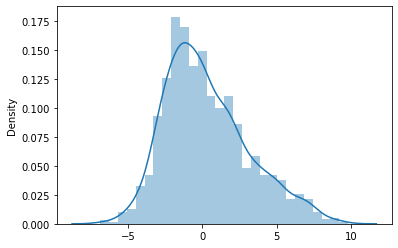

In [86]:
#By seeing above result, ideally the distribution should be Normal. If it is not then, we'll still have opportunity to furthure
#correct the model.
sns.distplot(train_errors)

#So, it is not Normal. Some skewness on right side, so still have scope to improve it further.

-- Decile Analysis: Dividing data into 10 parts based on cut-offs(p10,p20,p30,..)

In [87]:
##Decile is used to avoid comparison between each actual & predicted values. It helps to create certain no. of bins (10 here),
##to see the comparison of different bins and to find out if actual & predicted values are increasing/decreasing in sync.

train_results = pd.concat([train_actual, train_predicted], axis=1)
test_results = pd.concat([test_actual, test_predicted], axis=1)
train_results.columns = ['actual', 'pred']
test_results.columns = ['actual', 'pred']

train_results['Deciles']=pd.qcut(train_results['pred'],10, labels=False)
train_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

,actual,pred
Deciles,,
0,8.190210,7.504660
1,9.100034,9.352096
2,10.424389,10.668350
3,11.420621,11.615991
4,12.680226,12.517126
5,14.709780,13.371863
6,14.566154,14.291919
7,15.856980,15.203938
8,16.347932,16.019671


In [88]:
test_results['Deciles']=pd.qcut(test_results['pred'],10, labels=False)
test_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

,actual,pred
Deciles,,
0,7.932080,7.141652
1,8.986000,9.323979
2,10.633867,10.694382
3,11.240133,11.671740
4,12.897342,12.521018
5,14.571200,13.360143
6,14.219718,14.352701
7,16.362131,15.268236
8,16.300133,16.109218


In [89]:
# Two important things:
#Is model overfitting? Ans: No
#Is model underfitting? Ans: Yes (based on correlation between actual & errors), r-squre is low

#How to handle overfitting:
# Overfitting occurs because of complexity of model (Lot of variables, lots of transformations)
    #Regularization
    #Crosss validation (K-Fold validation)
# Standard errors are very high for coefficients (Because of smaple is low - number of observations are low)
# If the data have multicollineirity
# IF you don't follow the assumptions
# If you don't prepare data appropriate manner

# How to handle underfitting?
#if don't Including more variables
# if don't Follow the assumption of linearity (X & Y should have linear relationship)
# If the data have multicollineirity
# IF you don't follow the assumptions
# If you don't prepare data appropriate manner
# if you don't use right technique 
# if you don't used right Tuning parameters (Machine Learning)

In [90]:
import joblib
joblib.dump(ols_model_output, 'ols_model')

#### Lets save everything in metrics_df to pickle object
import pickle

# now you can save it to a file
with open(r'E:\AI\ALabs\Python - ML\Assignments-ML\3. Peer Group Lending - Predicting Intrest Rates\PredictingInterestRates_model_ols.pkl', 'wb') as f:
    pickle.dump(ols_model_output, f)
    
# and later you can load it
with open(r'E:\AI\ALabs\Python - ML\Assignments-ML\3. Peer Group Lending - Predicting Intrest Rates\PredictingInterestRates_model_ols.pkl', 'rb') as f:
    model = pickle.load(f)

In [91]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     742.7
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          3.81e-311
Time:                        23:49:43   Log-Likelihood:                 141.91
No. Observations:                1750   AIC:                            -275.8
Df Residuals:                    1746   BIC:                            -253.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [92]:
eqn = 'ln_Interest_Rate ~ Fico_avg+Inquiries_in_the_Last_6_Months+Loan_Purpose_debt_consolidation'

In [93]:
#smp.ols(formula = 'y~x1+x2+x3+x4', data=data_final)

ols_model = smp.ols(formula = eqn, data=data_final)
ols_model_output = ols_model.fit()

In [94]:
print(ols_model_output.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1098.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:49:43   Log-Likelihood:                 225.83
No. Observations:                2500   AIC:                            -443.7
Df Residuals:                    2496   BIC:                            -420.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

# Modeling - Data Preparation Step 4 -